## Lesson1
 - import data
 - create random numbers
 - plot timeseries data 
 - scatterplot of attractors
 

In [187]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

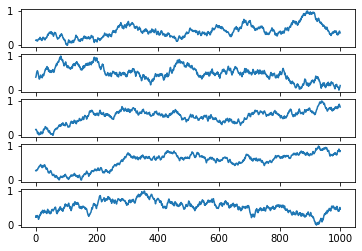

In [198]:
n, k = 1000, 5
ntrans = 300
xM = np.full(shape=(n+ntrans, k), fill_value=np.nan)
xM[0, :] = np.random.uniform(0, 1, (1, k))
for t in range(1, n+ntrans):
    xM[t, 0] = 0.99*xM[t-1, 0] + np.random.uniform()
    xM[t, 1] = 0.99*xM[t-1, 1] + np.random.uniform()
    xM[t, 2] = 0.99*xM[t-1, 2] + np.random.uniform()
    xM[t, 3] = 0.99*xM[t-1, 3] + np.random.uniform()
    xM[t, 4] = 0.99*xM[t-1, 4] + np.random.uniform()
xM = xM[ntrans:, :]
xM = (xM - np.min(xM, axis=0)) / np.ptp(xM, axis=0)

fig, ax = plt.subplots(k, 1)
for f in range(k):
    ax[f].plot(xM[:, [f]])

In [214]:
corr_ = np.corrcoef(xM.T)
eigval, eigvec = np.linalg.eigh(corr_)
lmax = (1+ np.sqrt(k/n))**2
# #A=VLV-1

corr_, eigval, lmax, eigvec@np.diag(eigval)@np.linalg.inv(eigvec)

(array([[ 1.        , -0.57817732,  0.43387954,  0.60370647, -0.32298552],
        [-0.57817732,  1.        , -0.43271633, -0.6295875 ,  0.24317492],
        [ 0.43387954, -0.43271633,  1.        ,  0.61346939,  0.02824336],
        [ 0.60370647, -0.6295875 ,  0.61346939,  1.        , -0.12123983],
        [-0.32298552,  0.24317492,  0.02824336, -0.12123983,  1.        ]]),
 array([0.30336615, 0.4090057 , 0.49410927, 1.07426673, 2.71925216]),
 1.1464213562373098,
 array([[ 1.        , -0.57817732,  0.43387954,  0.60370647, -0.32298552],
        [-0.57817732,  1.        , -0.43271633, -0.6295875 ,  0.24317492],
        [ 0.43387954, -0.43271633,  1.        ,  0.61346939,  0.02824336],
        [ 0.60370647, -0.6295875 ,  0.61346939,  1.        , -0.12123983],
        [-0.32298552,  0.24317492,  0.02824336, -0.12123983,  1.        ]]))

In [242]:
os.chdir(r'c:\Users\akfot\PycharmProjects\TimeSeriesLab/')
# #xM = np.loadtxt('./epileeg.dat')
xM = pd.read_csv('./epileeg.dat', header=None)
xM.head()


FileNotFoundError: [Errno 2] File b'./epileeg.dat' does not exist: b'./epileeg.dat'

In [ ]:
xM.describe(), xM.dtypes, xM.info()

In [ ]:
xM.plot()

## random noise ~ Φ(0,1)

In [ ]:
np.random.seed(1)
n = 1000
wM = np.random.normal(0, 1, size=n)
fig, ax = plt.subplots(1, 2, figsize=(18,10))
ax[0].plot(wM)
ax[1].hist(wM)

In [ ]:
x_t = wM[:-1]
x_t1 = wM[1:]
plt.scatter(x_t, x_t1)

In [ ]:
n = 1000
wM = np.random.normal(size=n)
xM = np.full(shape=(n, 1), fill_value=np.nan)
xM[0] = wM[0]
for t in np.arange(1, n):
    xM[t] = 0.8*xM[t - 1] + wM[t]
plt.plot(xM)
plt.figure()
plt.scatter(xM[:-1], xM[1:])

# functions for remove trend

In [226]:
def rolling_window(xV, window):
    # #set first values as nan because window is short
    first_values = np.full(shape=window-1, fill_value=np.nan)
    return np.r_[first_values, np.convolve(xV, np.ones(window), mode='valid') / window]

def polynomial_fit(xV, p):
    '''
    fit to a given time series with a polynomial of a given order.
    :param xV: vector of length 'n' of the time series
    :param p: the order of the polynomial to be fitted
    :return: vector of length 'n' of the fitted time series
    '''
    n = xV.shape[0]
    xV = xV[:]
    if p > 1:
        tV = np.arange(n)
        bV = np.polyfit(x=tV, y=xV, deg=p)
        muV = np.polyval(p=bV, x=tV)
    else:
        muV = np.full(shape=n, fill_value=np.nan)
    return muV

def get_firstdiffs(xV, use_logs=False):
    if use_logs:
        return np.diff(np.log(xV))
    else:
        return np.diff(xV)

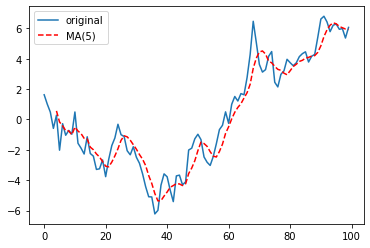

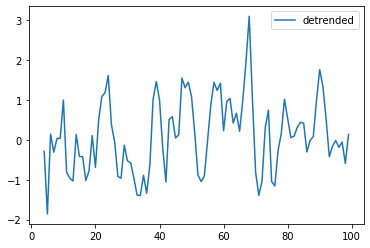

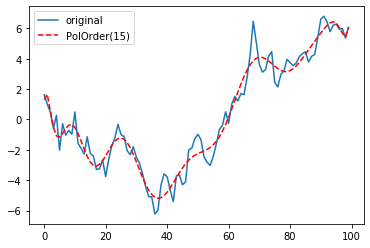

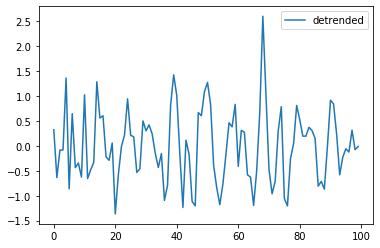

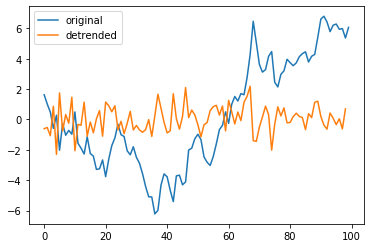

In [240]:
np.random.seed(1)
n=100
ma_window=5
yM = np.cumsum(np.random.normal(0, 1, n))
ma5 = rolling_window(yM, window=ma_window)
xM = yM-ma5
plt.figure();
plt.plot(yM, label='original');
plt.plot(ma5, color='red', linestyle='--', label=f'MA({ma_window})');
plt.legend();
plt.figure();
plt.plot(xM, label='detrended');
plt.legend();
#####
pol_order=15
pol2 = polynomial_fit(yM, p=pol_order)
xM = yM-pol2
plt.figure();
plt.plot(yM, label='original');
plt.plot(pol2, color='red', linestyle='--', label=f'PolOrder({pol_order})');
plt.legend();
xM = yM-pol2
plt.figure();
plt.plot(xM, label='detrended');
plt.legend();
#####
xM = get_firstdiffs(yM)
plt.figure();
plt.plot(yM, label='original');
plt.plot(xM, label='detrended');
plt.legend();



https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.ArmaProcess.html
https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html


## Generate sample from given ARMA process

In [181]:
phiV = np.array([-0.8])
thetaV = np.array([])
phiV = np.r_[1, -phiV] # #add zero lag and negate
thetaV = np.r_[1, thetaV] # add zero lag
arma_process = sm.tsa.ArmaProcess(phiV, thetaV)
xM = arma_process.generate_sample(1000)
xM = xM - np.mean(xM)

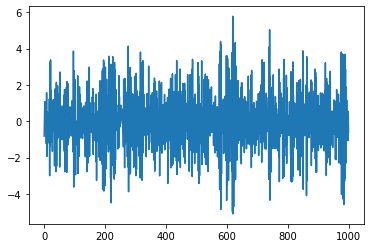

In [182]:
plt.plot(xM);

- calculate and plot acf-pacf

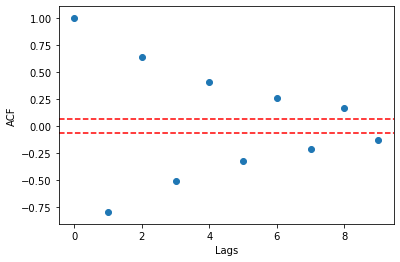

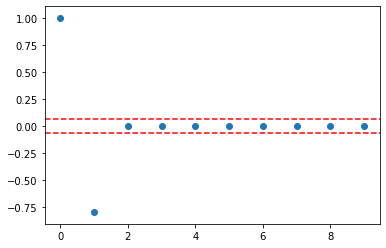

In [183]:
acf_ = arma_process.acf()
pacf_ = arma_process.pacf()
plt.figure();
nlags = 10
plt.scatter(np.arange(nlags), acf_[:nlags], marker='o');
plt.xlabel('Lags');
plt.ylabel('ACF');
alpha=0.05
signif_levels = 1.96 / np.sqrt(xM.shape[0])
plt.axhline(signif_levels, color='red', linestyle='--');
plt.axhline(-signif_levels, color='red', linestyle='--');
plt.figure();
plt.scatter(np.arange(nlags), pacf_[:nlags], marker='o');
plt.axhline(signif_levels, color='red', linestyle='--');
plt.axhline(-signif_levels, color='red', linestyle='--');

- calculate acf and pacf using lib

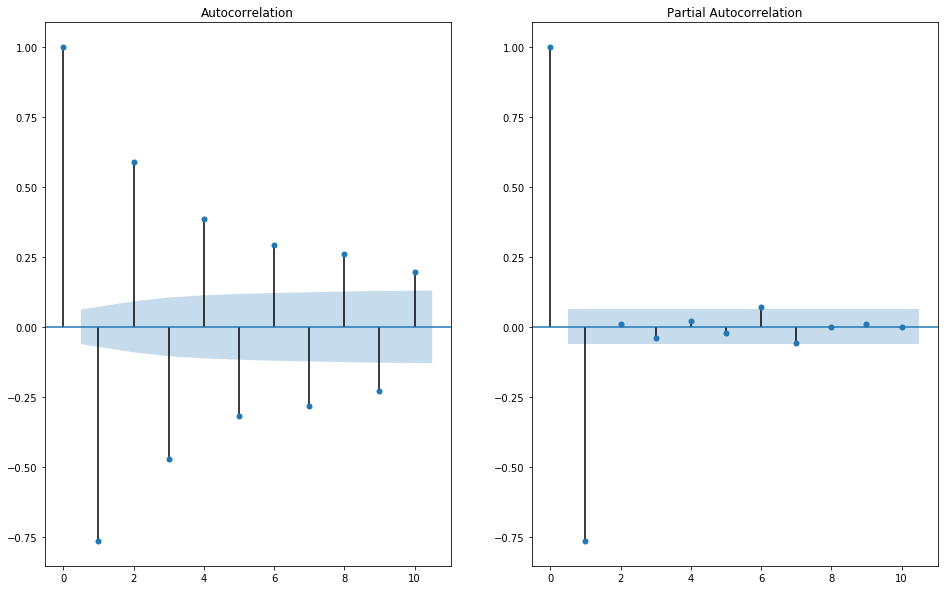

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16,10))
plot_acf(xM, lags=nlags, alpha=alpha, ax=ax[0]);
plot_pacf(xM, lags=nlags, alpha=alpha, ax=ax[1]);

- Get acf from phi, theta coefficients

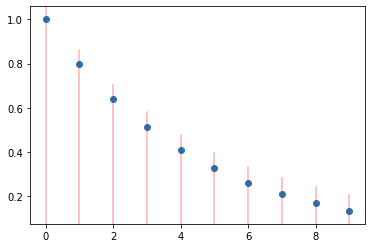

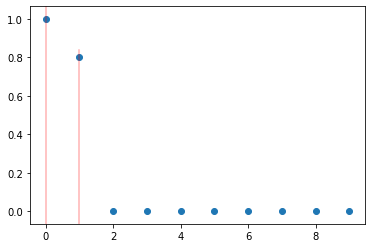

In [184]:
from statsmodels.tsa.arima_process import arma_acf, arma_pacf
acf_ = arma_acf([1, -0.8], [1], lags=10)
fig, ax = plt.subplots(1, 1)
ax.scatter(np.arange(10), acf_, marker='o');
for t in np.arange(10):
    ax.axvline(t, ymax=acf_[t], color='red', alpha=0.3);
pacf_ = arma_pacf([1, -0.8], [1], lags=10)
fig, ax = plt.subplots(1, 1)
ax.scatter(np.arange(10), pacf_, marker='o');
for t in np.arange(10):
    ax.axvline(t, ymax=pacf_[t], color='red', alpha=0.3);


In [24]:
#arma_process.arroots,arma_process.maroots, arma_process.acf(), arma_process.pacf(), arma_process.isinvertible, arma_process.isstationary 

In [122]:
proportion = 0.7
split_point = np.int(proportion*xM.shape[0])
train_set = xM[:split_point].reshape(-1, 1)
test_set = xM[split_point:].reshape(-1, 1)

In [123]:
p = 1
d = 0
q = 0
fit_model = ARIMA(train_set, order=(p, d, q)).fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                     ARMA(1, 0)   Log Likelihood                -990.315
Method:                       css-mle   S.D. of innovations              0.995
Date:                Sat, 20 Mar 2021   AIC                           1986.630
Time:                        20:06:08   BIC                           2000.283
Sample:                             0   HQIC                          1991.908
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0125      0.022     -0.573      0.567      -0.055       0.030
ar.L1.y       -0.7325      0.026    -28.579      0.000      -0.783      -0.682
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3651           +0.0000j            1.3651            0.5000
-----------------------------------------------------------------------------
"""

- plot fittedvalues vs train set

0.20962010812897633

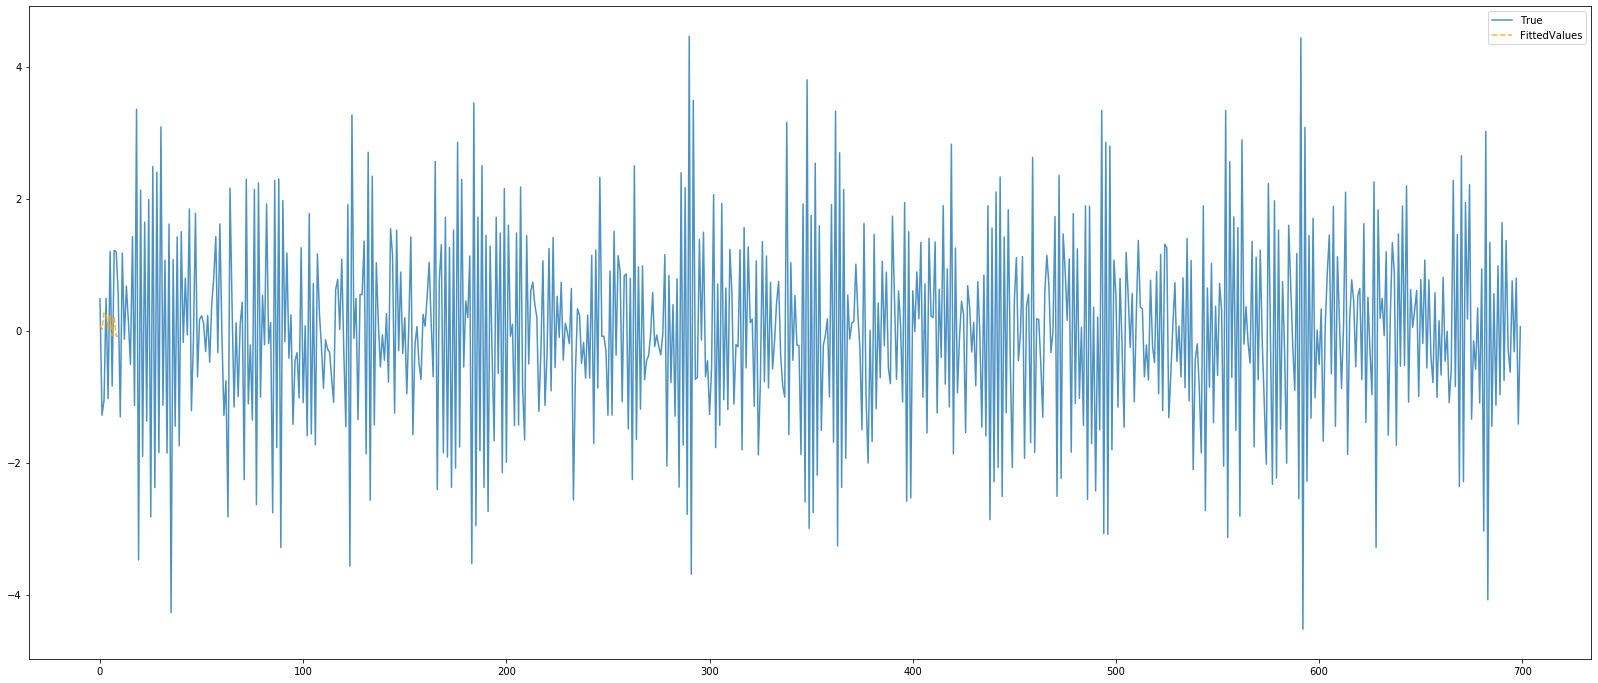

In [102]:
fittedvalues = fit_model.fittedvalues
fittedvalues = np.array(fittedvalues).reshape(-1, 1)
resid = fit_model.resid
plt.figure(figsize=(28, 12));
plt.plot(train_set, label='True', alpha=0.8);
plt.plot(fittedvalues, label='FittedValues', alpha=0.8, color='orange', linestyle='--');
plt.legend();


- calculate nrmse in sample (fitting error)  

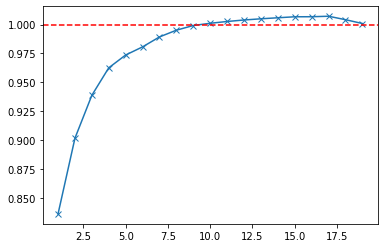

In [140]:
#nrmse = np.sqrt(np.mean((fittedvalues - train_set)**2)) / np.std(train_set)
#nrmse
Tmax = 20
nrmseV = np.full(shape=Tmax-1, fill_value=np.nan)
for T in np.arange(1, Tmax):
    errors = []
    for t in np.arange(1, train_set.shape[0]-T):
        pred_ = fit_model.predict(start=t, end=t+T, dynamic=True)
        ytrue = train_set[t+T, 0]
        error = pred_[-1] - ytrue
        errors.append(error)
    errors = np.array(errors)
    mse = np.mean(np.power(errors, 2))
    rmse = np.sqrt(mse)
    nrmseV[T-1] = (rmse / np.std(train_set))
plt.plot(np.arange(1, Tmax), nrmseV, marker='x');
plt.axhline(1, color='red', linestyle='--');
    

(array([-0.01245411, -0.37364385,  0.91719235]), array([[-0.01245411],
        [-0.37364385],
        [ 0.91719235]]), 0.6797442020690595, array([-0.37364385,  0.25212692, -0.20626671]), 0.8482279915791077, array([-0.73252644]))

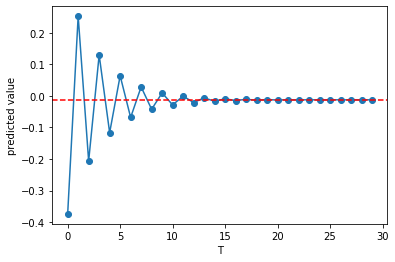

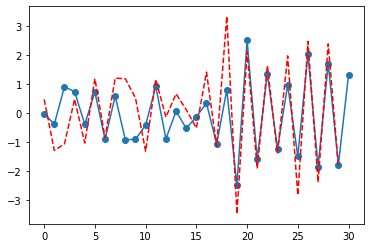

In [45]:
# #use last predicted values for next prediction multistep
insample_preds_multistep = fit_model.predict(dynamic=True)
plt.plot(insample_preds_multistep[:30], label='Multistep prediction', marker='o')
plt.axhline(np.mean(train_set), label='TimeSeries mean', color='red', linestyle='--')
plt.xlabel('T')
plt.ylabel('predicted value')
# # predict for next step
insample_preds = fit_model.predict(start=0, end=30)
plt.figure()
plt.plot(insample_preds, label='One-step prediction', marker='o')
plt.plot(train_set[:30], label='True', color='red', linestyle='--')
insample_preds[:3], fittedvalues[:3], np.sqrt(np.mean((train_set.reshape(-1, 1)-fittedvalues.reshape(-1,1))**2))/np.std(train_set), insample_preds_multistep[:3],-1.17495022*fit_model.arparams[0]+fit_model.params[0], fit_model.arparams


In [ ]:
oos_forecast = fit_model.forecast(steps=30)[0]
plt.plot(oos_forecast)
plt.plot(test_set[:30])
#fittedvalues.shape, train_set.shape, np.mean((fittedvalues - train_set)**2)
#plt.hist(resid)

In [ ]:
resid_correlation_test = fit_model.test_serial_correlation(method='ljungbox', lags=10)

In [ ]:
statistic, pvalues = resid_correlation_test[0][0], resid_correlation_test[0][1]
pvalues


In [ ]:
plt.plot(pvalues, marker='x')
plt.axhline(0.05, color='red', linestyle='--')
plt.xlabel('Lags')
plt.ylabel('LjungBox test p-values')

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(fittedvalues, color='red', alpha=0.9, linestyle='--')
plt.plot(train_set, color='blue', alpha=0.3, linestyle='--')


In [ ]:
T=1
fit_yhat = fit_model.forecast(1)
fit_yhat = np.array(fit_yhat).reshape(-1, 1)
fit_y = train_set[T:]
nrmse = calculate_nrmse(true=fit_y, pred=fit_yhat)
nrmse

In [ ]:
fit_model.params, fit_y[0],fit_yhat[0],  fit_model.fittedvalues[0]*0.83261528-0.19844635, fit_y.shape, fit_yhat.shape

In [ ]:
def calculate_nrmse(true, pred):
    return np.sqrt(np.mean((true - pred)**2)) / np.std(true)


In [ ]:
plt.plot(fit_y)
plt.plot(fit_yhat)

In [ ]:
max_T = 10
nrmseV = np.full(shape=max_T, fill_value=np.nan)
for T in np.arange(1, max_T):
    fit_yhat = fit_model.predict(T, dynamic=True)
    fit_yhat = np.array(fit_yhat).reshape(-1, 1)
    fit_y = train_set[T:]
    nrmse = calculate_nrmse(true=fit_y, pred=fit_yhat)
    nrmseV[T-1] = nrmse
plt.plot(nrmseV)
    

- multistep prediction

In [ ]:
T=1
fit_yhat = fit_model.predict(T, dynamic=True)